# DSC 424 Final Project

In [71]:
#Import packages
import pandas as pd
import os 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import warnings
from math import sqrt
import pylab
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
#Import data
song_data = pd.read_csv(r'https://raw.githubusercontent.com/PixarJunkie/dsc-424-final-project/master/data/song_data.csv')
song_info = pd.read_csv(r'https://raw.githubusercontent.com/PixarJunkie/dsc-424-final-project/master/data/song_info.csv')

#Shape of data
print('song_data shape: ' + str(song_data.shape))
print('sing_info shape: ' + str(song_info.shape))

song_data shape: (18835, 15)
sing_info shape: (18835, 4)


In [79]:
#Columns
print('song_data columns: ' + str(list(song_data.columns)))
print('song_info columns: ' + str(list(song_info.columns))) 

song_data columns: ['song_name', 'song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']
song_info columns: ['song_name', 'artist_name', 'album_names', 'playlist']


# Notes about the variables

**Song_ popularity** [0,100] Dependent variable 

**Song_duration** [1.200000e+04,1.799346
e+06] In milliseconds 

**Acousticness** [0,0.996] 1.0 represents high confidence the track is
acoustic. 

**Danceability** [0,0.897] A value of 0.0 is least danceable and 1.0 is
most danceable 

**Energy** [0.001,0.999] A value of 1 means most energetic (tracks
feel fast, loud, and noisy) 

**Instrumentalness** [0.01,0.986] Values above 0.5 are intended to represent
instrumental tracks, but confidence is
higher as the value approaches 1.0. 

**Liveness** [0,0.997] Higher liveness values represent an
increased probability that the track was
performed live 

**Loudness** [-38.768, 1.585] values are averaged across the entire track
Speechiness [0,0.94] Values above 0.66 describe tracks that are
probably made entirely of spoken words.
Values between 0.33 and 0.66 describe
tracks that may contain both music and
speech, including such cases as rap music.
Values below 0.33 most likely represent
music and other non-speech-like tracks. 

**Tempo** [0 ,242.318] 

**Audio_valence** [0,0.984] Tracks with high valence sound more
positive (e.g. happy, cheerful, euphoric)
Ordinal
(3) 

**Key** [0,1,2,3,4,5,6,7,8,9,10,11] 0 = C, 1 = C♯/D♭, 2 = D, and so on 

**Audio_mode** [0 or 1] Major is represented by 1 and minor is 0 

**Time_signature** [0,1 ,3,4,5] Nominal (4) 

**Categorical**: 
Album_name 
song_name 
play_list 
artist_name

# NULLS

#### NOTES: 

There are no null values in the dataset

In [5]:
#Check for null values 
print(song_data.isnull().sum())
print(song_info.isnull().sum())

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64
song_name      0
artist_name    0
album_names    0
playlist       0
dtype: int64


# Histograms and Boxplots

#### NOTES: 

Some of the columns such as song duration, instrumentalness, and time signature are imbalanced. Will consider removing some of the outliers to smooth the distributions. 

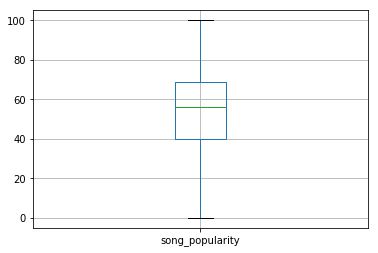

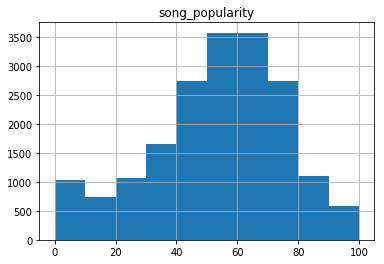

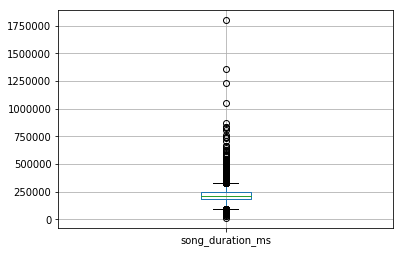

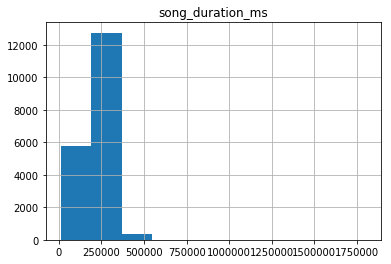

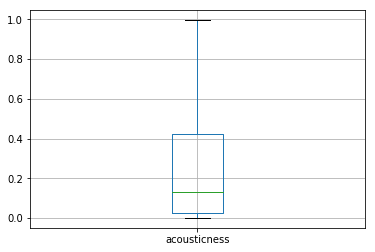

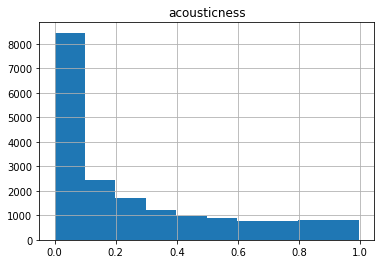

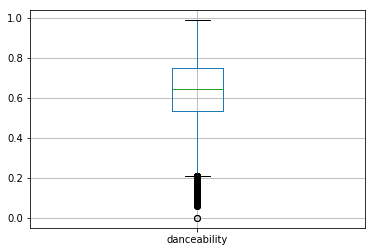

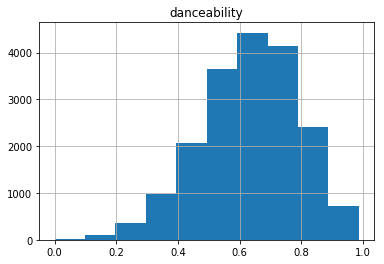

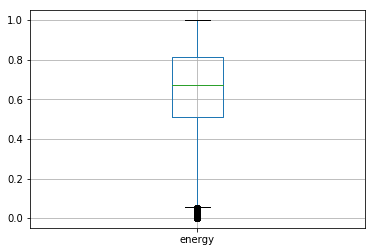

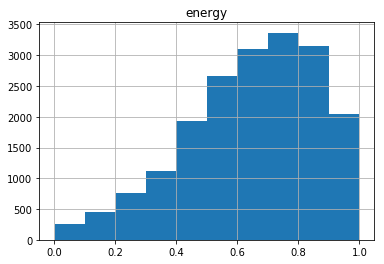

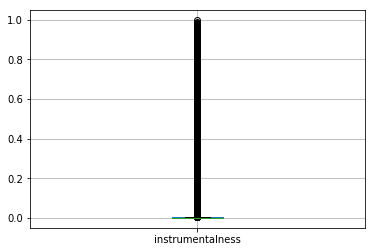

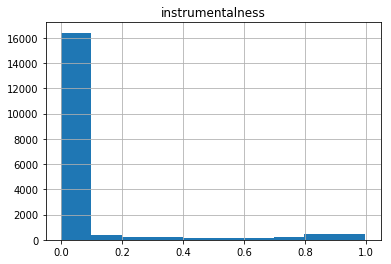

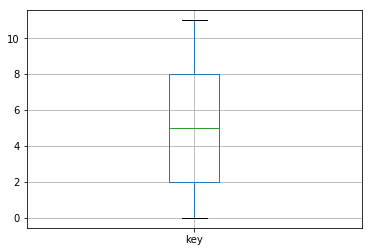

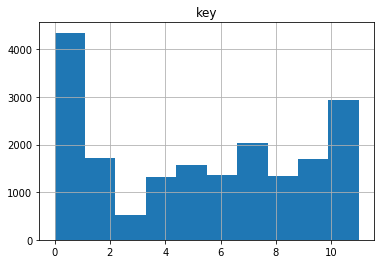

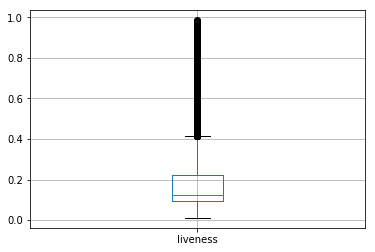

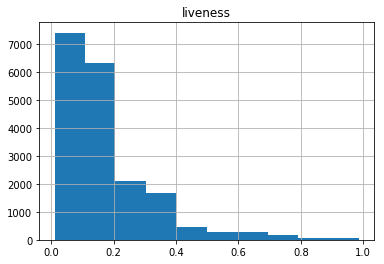

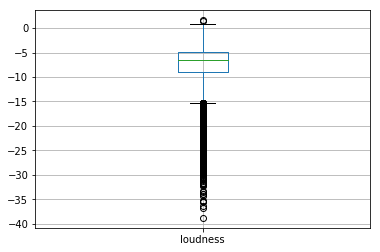

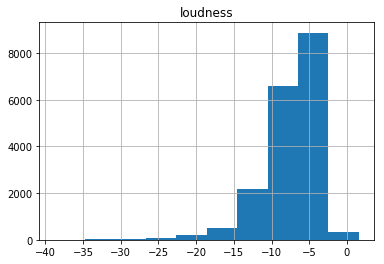

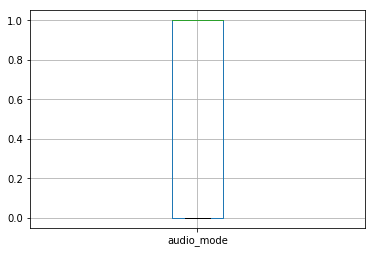

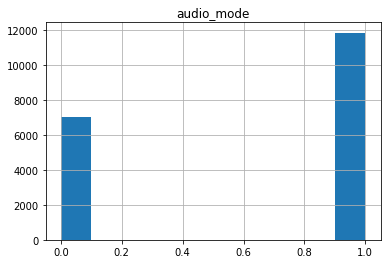

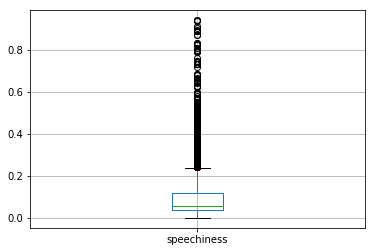

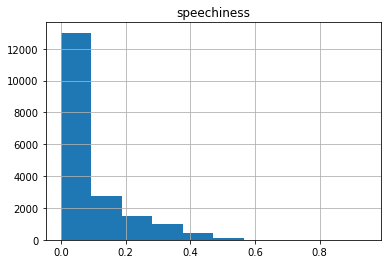

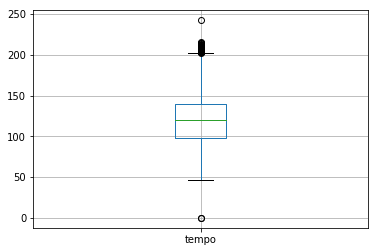

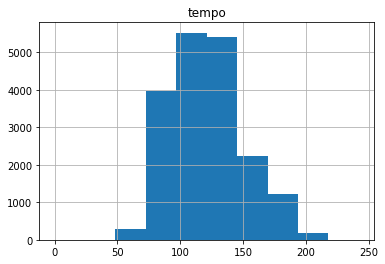

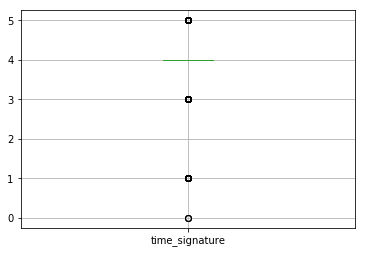

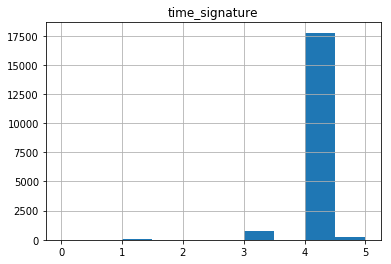

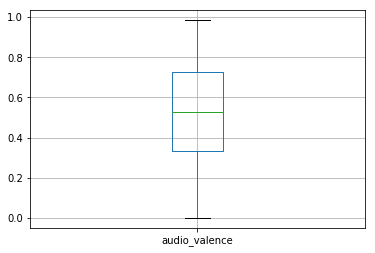

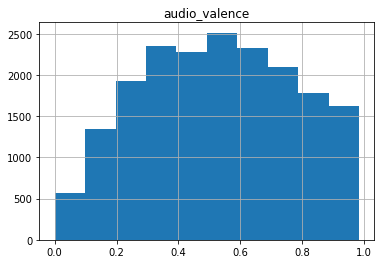

In [33]:
#Histograms
for col in song_data_2.columns: 
    plt.figure()
    song_data_2.boxplot([col])
    song_data_2.hist([col])

# Correlation Plot

#### NOTES: 
Loudness and energy have a moderate positive correlation. This is a logical relationship since a louder song would register high decibels resulting in a higher energy score. Will consider removing one, or creating a new variable that captures both. Acousticness and energy have a moderate negative correlation which is also logical since acoustic songs tend to be quieter, resulting in lower decibels/energy.

In [34]:
#Correlation Matrix
song_data_2.corr().style.background_gradient(cmap='coolwarm')

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1,-0.0188994,-0.0651811,0.10429,0.00136508,-0.130907,-0.0131604,-0.0389366,0.0994422,-0.00496934,0.0214794,-0.0226721,0.0349832,-0.0528953
song_duration_ms,-0.0188994,1,-0.097882,-0.104985,0.0926876,-0.0151878,-0.00461483,0.0160862,0.016469,-0.0263281,-0.0834473,0.0127907,0.000264104,-0.0634214
acousticness,-0.0651811,-0.097882,1,-0.1825,-0.662639,0.173098,-0.00202483,-0.0825374,-0.557744,0.0641003,-0.0935741,-0.136421,-0.157177,-0.12167
danceability,0.10429,-0.104985,-0.1825,1,0.0443733,-0.130483,0.00772311,-0.0906937,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014
energy,0.00136508,0.0926876,-0.662639,0.0443733,1,-0.205914,0.0204156,0.167143,0.755516,-0.0516048,0.062053,0.162448,0.146265,0.316742
instrumentalness,-0.130907,-0.0151878,0.173098,-0.130483,-0.205914,1,-0.00946324,-0.0328867,-0.390248,-0.0149828,-0.081138,-0.0369343,-0.0691812,-0.17857
key,-0.0131604,-0.00461483,-0.00202483,0.00772311,0.0204156,-0.00946324,1,-0.00819284,0.0104518,-0.169848,0.0336394,0.0032385,-0.00828209,0.0253563
liveness,-0.0389366,0.0160862,-0.0825374,-0.0906937,0.167143,-0.0328867,-0.00819284,1,0.10245,-0.00103511,0.0908453,0.0318759,0.0132893,0.0137885
loudness,0.0994422,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.0104518,0.10245,1,-0.0585065,0.078164,0.129938,0.119241,0.199696
audio_mode,-0.00496934,-0.0263281,0.0641003,-0.106539,-0.0516048,-0.0149828,-0.169848,-0.00103511,-0.0585065,1,-0.111627,0.020448,-0.0240418,-0.00455803


# Initial Multiple Regression

#### Notes
The initial multiple regression shows a moderately high multiple R-squared on the trianing set, though some of the additional analysis into the residuals suggest that there are some issues with the model. The normal residuals plot shows a clear slanted line at the start and increasing negative error moving to the right. The QQ also plot does not look uniform. The predicted vs. actuals on the test set do not show the correlation that we would expect by looking at the multiple R2 from the traning set. Will consider other models, removing correlated variables, feature selection, etc. 

In [44]:
#Dummy Vars via mapping
categ_cols = song_data.dtypes.pipe(lambda x: x[x == 'object']).index
mapping = {}

for col in categ_cols: 
    song_data[col], mapping[col] = pd.factorize(song_data[col])

In [ ]:
#Dummy through pd.get_dummies

In [54]:
#Training and test sets
X = song_data.drop('song_popularity', axis = 1)
y = song_data.song_popularity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)
print('X_train shape: ' + str(X_train.shape))
print('y_train shape: ' + str(y_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('y_test shape: ' + str(y_test.shape))

X_train shape: (13184, 14)
y_train shape: (13184,)
X_test shape: (5651, 14)
y_test shape: (5651,)


In [55]:
#Regression
lm = sm.OLS(y_train, X_train).fit()

# Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        song_popularity   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     5921.
Date:                Sun, 19 May 2019   Prob (F-statistic):               0.00
Time:                        21:45:58   Log-Likelihood:                -58959.
No. Observations:               13184   AIC:                         1.179e+05
Df Residuals:                   13170   BIC:                         1.181e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
song_name           -0.0012   4.93e-05    -24.101      0.000      -0.001      -0.001
song_duration_ms  7.885e-06    3.1e-06      2.542      0.011     1.8e-06     1.4e-05
acousticness         2.7515      0.851      3.233      0.001       1.083       4.420
danceability        25.3029      1.322     19.134      0.000      22.711      27.895
energy               4.1610      1.507      2.762      0.006       1.208       7.114
instrumentalness    -8.8720      0.921     -9.638      0.000     -10.676      -7.068
key                  0.0719      0.052      1.393      0.164      -0.029       0.173
liveness            -2.7290      1.325     -2.060      0.039      -5.326      -0.132
loudness             0.0950      0.076      1.252      0.210      -0.054       0.244
audio_mode           1.0678      0.391      2.732      0.006       0.302       1.834
speechiness         -2.7380      1.834     -1.493      0.135      -6.333       0.857
tempo                0.0351      0.006      5.512      0.000       0.023       0.048
time_signature      10.7271      0.438     24.476      0.000       9.868      11.586
audio_valence      -13.9000      0.884    -15.719      0.000     -15.633     -12.167
==============================================================================
Omnibus:                      714.641   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              837.358
Skew:                          -0.617   Prob(JB):                    1.48e-182
Kurtosis:                       2.995   Cond. No.                     2.33e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Training Residuals

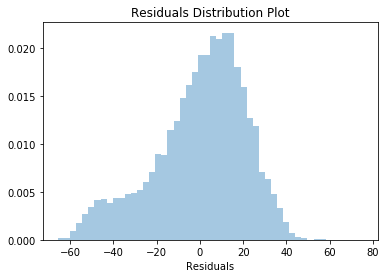

In [62]:
#Calculate residuals
train_preds = lm.fittedvalues
res = y_train - train_preds

#Residual distribution
ax = sns.distplot(res, kde = False, rug = False, norm_hist = True)
plt.title('Residuals Distribution Plot')
plt.xlabel('Residuals')
plt.show()

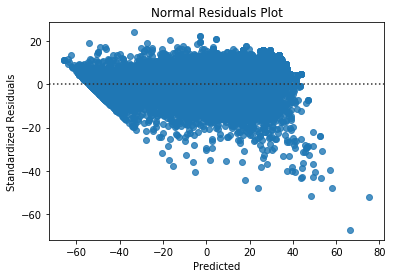

In [64]:
#Normal Residuals Plot
ax = sns.residplot(res, train_preds)
plt.title('Normal Residuals Plot')
plt.xlabel('Predicted')
ax.set_ylabel('Standardized Residuals')
plt.show()

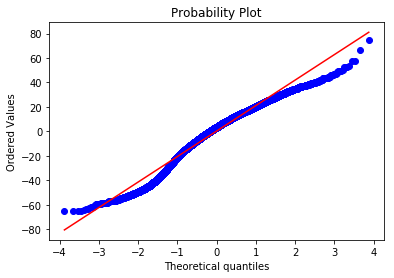

In [67]:
#Probability Plot
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(res, dist="norm", plot=pylab)
pylab.show()

# Test Predictions

Train Root Mean Square Error: 21.18039827236602
Test Root Mean Square Error: 21.156133550501618


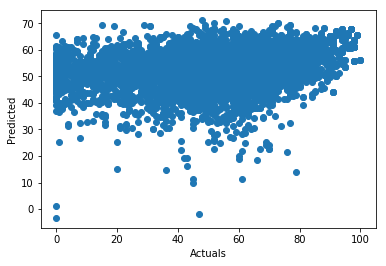

In [73]:
#Prediction on test set/plot predicted vs. actuals
test_preds = lm.predict(X_test)
plt.scatter(y_test, test_preds)
plt.xlabel('Actuals')
plt.ylabel('Predicted')
#Train RMSE
train_rmse = sqrt(mean_squared_error(y_train, train_preds))
#Test RMSE
test_rmse = sqrt(mean_squared_error(y_test, test_preds)) 
print('Train Root Mean Square Error: ' + str(train_rmse))
print('Test Root Mean Square Error: ' + str(test_rmse))